In [58]:
import numpy as np
import pandas as pd

import seaborn as sns

In [59]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [60]:
df.shape

(800, 13)

In [61]:
df.drop(columns = ['#'] , inplace = True)

In [62]:
df['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [15]:
df['Defense'].sort_values(ascending=False)

230    230
224    230
333    230
223    200
414    200
      ... 
68      15
186     15
261     10
488      5
121      5
Name: Defense, Length: 800, dtype: int64

In [63]:
df.isna().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [75]:
df['Type 2'].fillna('None' , inplace = True)

In [76]:
df.isna().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [18]:
df.corr()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,1.000000,-0.067074,-0.016654,-0.071396,-0.008356,-0.081029,-0.025437,-0.063574,-0.069318,-0.031623,-0.035371,0.047575
Type 1,-0.067074,1.000000,0.000646,0.023251,0.094230,-0.037525,0.103439,-0.006694,0.018911,-0.066471,-0.101129,-0.010162
Type 2,-0.016654,0.000646,1.000000,-0.190463,-0.092818,-0.169240,-0.085407,-0.142016,-0.106041,-0.162559,-0.101504,-0.087771
Total,-0.071396,0.023251,-0.190463,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,-0.008356,0.094230,-0.092818,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,-0.081029,-0.037525,-0.169240,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,-0.025437,0.103439,-0.085407,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,-0.063574,-0.006694,-0.142016,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,-0.069318,0.018911,-0.106041,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,-0.031623,-0.066471,-0.162559,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715


<AxesSubplot:>

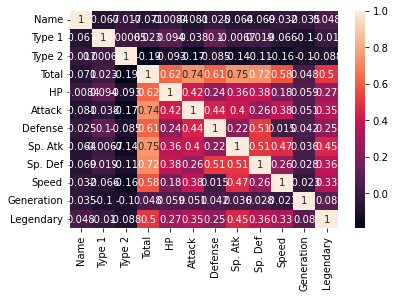

In [19]:
sns.heatmap(df.corr(),annot = True)

In [77]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Name'] = le.fit_transform(df['Name'])
df['Type 1'] = le.fit_transform(df['Type 1'])
df['Type 2'] = le.fit_transform(df['Type 2'])
df['Legendary'] = le.fit_transform(df['Legendary'])

In [78]:
x = df.iloc[: , :-1]
y = df['Legendary']

In [79]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3 , random_state = 1)

In [84]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score,r2_score

print(accuracy_score(y_test,pred))
print(r2_score(y_test,pred))

0.8916666666666667
-0.35681669928245263


C:\Users\Sravanthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(r2_score(y_test,preddt))

0.925
0.0606653620352251


In [86]:
from sklearn.ensemble import RandomForestClassifier

dtr = RandomForestClassifier()
dtr.fit(x_train,y_train)
preddtr = dtr.predict(x_test)

print(accuracy_score(y_test,preddtr))
print(r2_score(y_test,preddtr))

0.9375
0.21722113502935425


In [48]:
data = pd.DataFrame(columns=['Ac','Pre'])
data['Ac']= y_test
data['Pre']= preddt
data

,Ac,Pre
8,0,0
510,0,0
175,0,0
735,0,0
242,0,0
...,...,...
119,0,0
82,0,0
429,1,0
614,0,0


In [49]:
data['Pre'].value_counts()

0    219
1     21
Name: Pre, dtype: int64

In [50]:
d1 = data[data['Pre']==1]
d0 = data[data['Pre']==0]

In [57]:
data[(data['Pre'] == data['Ac'])].value_counts()

Ac  Pre
0   0      210
1   1       12
dtype: int64

In [88]:
from sklearn.metrics import confusion_matrix

con = confusion_matrix(y_test,preddt)
con

array([[210,   9],
       [  9,  12]], dtype=int64)